In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

!pip install mglearn
import mglearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)

In [3]:
#building random forests (5 trees)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import  train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

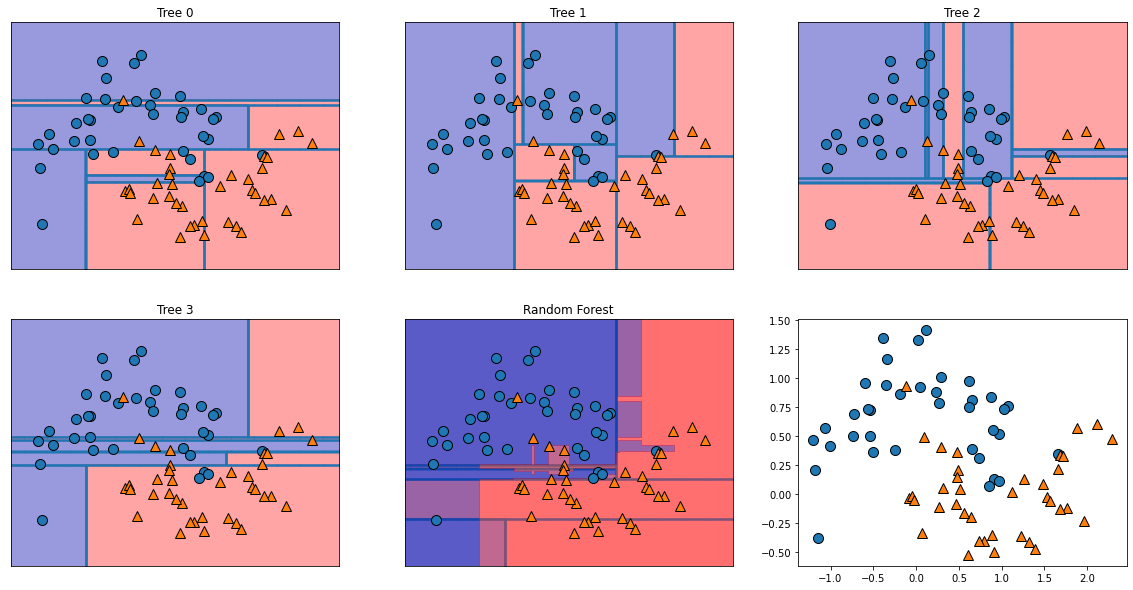

In [4]:
#Random forest representation

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, 1], alpha=0.4)
axes[-1,1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

In [5]:
#Building random forest(100 trees)
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X=cancer.data
y=cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


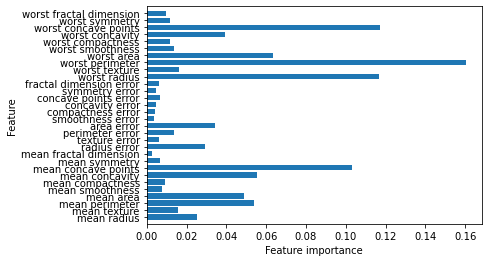

In [6]:
plot_feature_importances_cancer(forest)

In [9]:
#exercise
from sklearn.datasets import load_iris
iris_dataset = load_iris()

X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
forest = RandomForestClassifier(n_estimators = 5, max_depth = 3, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.973
Accuracy on test set: 0.947


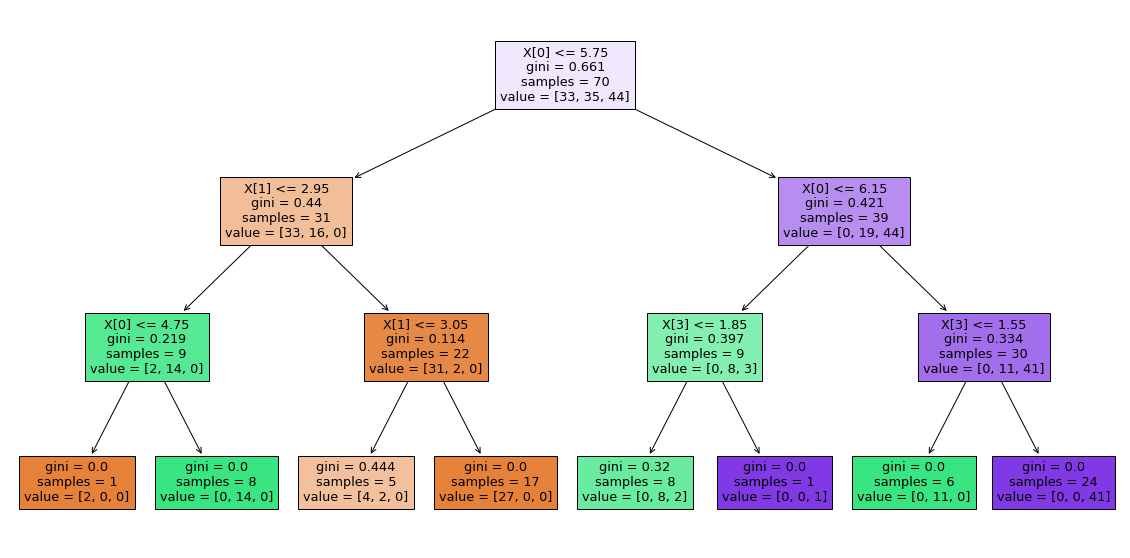

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(forest.estimators_[3],  filled=True);

C:\Users\kwass\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\kwass\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


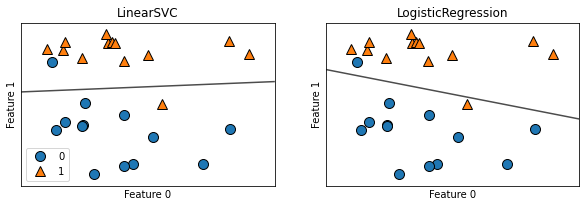

In [25]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#Decision boundaries of a linear SVM and Logistic regression on the forge dataset th the default parameters
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
  ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

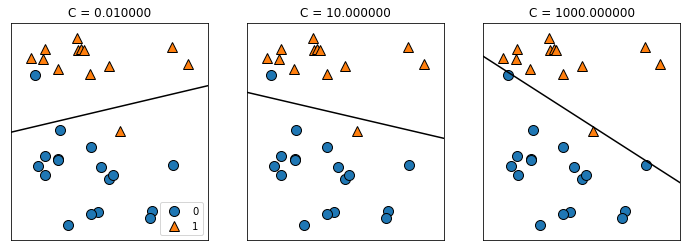

In [26]:
#Decision boundaries of a linear SVM on the forge dataset for different values of C
mglearn.plots.plot_linear_svc_regularization()

In [27]:
#Let's analyse LinearLogistic in more detail on the Breast Cancer dataset:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X=cancer.data
y=cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)
logreg = LogisticRegression(C=3).fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.941
Accuracy on test set: 0.965


C:\Users\kwass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#Let's try to increase C to fit a more flexible model:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(logreg100.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg100.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.951


C:\Users\kwass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\kwass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


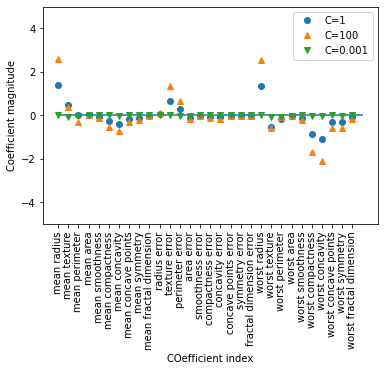

In [29]:
#Exercice 1
#Coefficients learned by logistic regression on the Breast Cancer dataset for different values of C
logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("COefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [30]:
#exercice
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X=cancer.data
y=cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg_model = LogisticRegression(C=100)
logreg_model.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(logreg_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg_model.score(X_test, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


C:\Users\kwass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


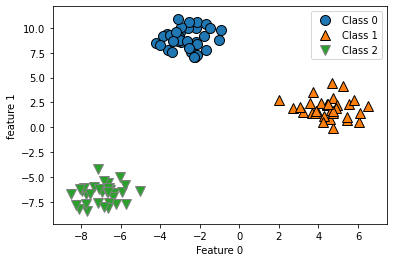

In [31]:
#two-dimensional toy dataset containing three classes
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [32]:
#We train a LinearSVC classifier on the dataset
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape:  (3,)


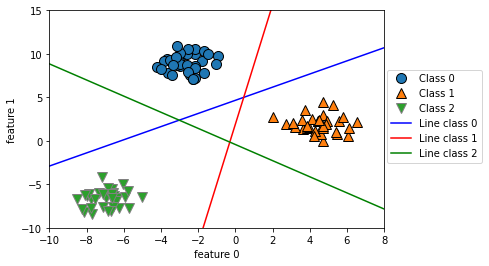

In [33]:
#Decision boundaries learned by the three one-vs.-rest classifiers
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["Class 0","Class 1", "Class 2", "Line class 0", "Line class 1",
            "Line class 2"], loc=(1.01,0.3))

Text(0, 0.5, 'feature 1')

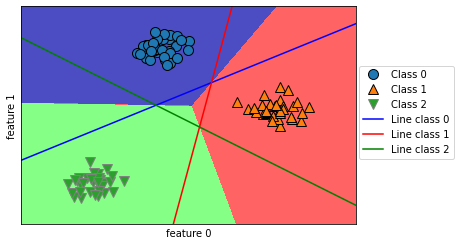

In [34]:
#Multiclass decision boundaries derived from the three one-vs.-rest classifiers
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(["Class 0","Class 1", "Class 2", "Line class 0", "Line class 1",
            "Line class 2"], loc=(1.01,0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")